# Краткий обзор основных библиотек:

NumPy:
- Базовая библиотека для научных вычислений в Python.  
- Предоставляет многомерный массив ndarray, векторизованные операции, линалг, генераторы случайных чисел.  

Pandas:
- Высокоуровневая библиотека для работы с табличными данными (DataFrame, Series).  
- Удобная загрузка/сохранение данных, фильтрация, группировка, агрегация, работа с временными рядами.  

Scikit‑learn:
- Набор алгоритмов машинного обучения (классификация, регрессия, кластеризация, понижение размерности и т. д.).  
- Единый API: .fit(), .transform(), .fit_predict(), интеграция с пайплайнами.  

umap-learn (UMAP):
- Алгоритм понижения размерности и manifold‑обучения (Uniform Manifold Approximation and Projection).  
- Хорошо подходит для визуализации высокоразмерных данных и как этап препроцессинга перед кластеризацией.  


In [ ]:
%pip install numpy pandas scikit-learn matplotlib seaborn ipywidgets
%pip install umap-learn  

In [3]:
# ===== Импорт библиотек =====
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris  # встроенный датасет Iris 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# ===== Загрузка датасета Iris =====
iris_bunch = load_iris()  # sklearn.utils.Bunch с полями data, target, feature_names и т. д. 

# Преобразуем в pandas.DataFrame
df = pd.DataFrame(
    data=iris_bunch.data,
    columns=iris_bunch.feature_names
)  # стандартный способ перевода датасета sklearn в DataFrame. [web:4][web:9]

# Добавим столбец с целевым классом в виде чисел и текстовых меток
df["target"] = iris_bunch.target
df["target_name"] = df["target"].apply(lambda i: iris_bunch.target_names[i])  # имена видов ириса. 


In [5]:
# ===== Первичный анализ структуры данных =====
print("Первые 5 строк:")
print(df.head())  # быстрое представление структуры табличных данных. 

print("\nИнформация о DataFrame:")
print(df.info())  # типы столбцов, количество непустых значений. 

print("\nОписательная статистика по числовым признакам:")
print(df.describe())  # среднее, стандартное отклонение, квартили и т. д.

print("\nРаспределение классов:")
print(df["target_name"].value_counts())  # баланс классов для задачи классификации. 




Первые 5 строк:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    floa

In [6]:
# ===== Простые визуализации =====
sns.set(style="whitegrid")

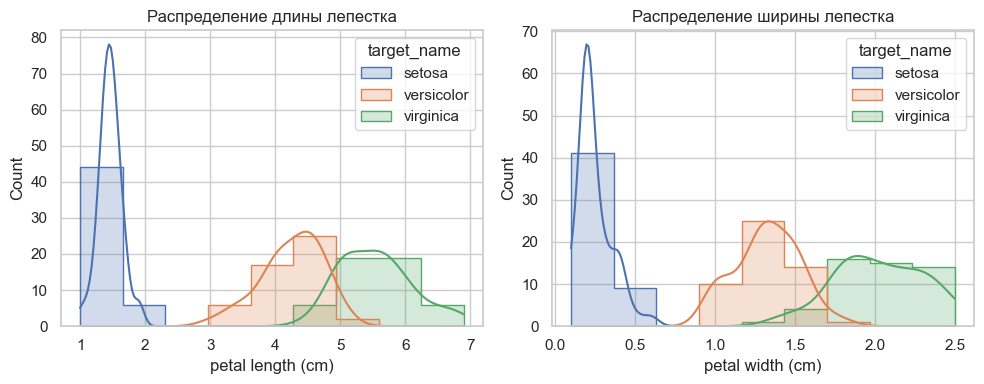

In [7]:
# Диаграммы распределения длины и ширины лепестка по классам
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(
    data=df,
    x="petal length (cm)",
    hue="target_name",
    kde=True,
    element="step"
)
plt.title("Распределение длины лепестка")

plt.subplot(1, 2, 2)
sns.histplot(
    data=df,
    x="petal width (cm)",
    hue="target_name",
    kde=True,
    element="step"
)
plt.title("Распределение ширины лепестка")
plt.tight_layout()
plt.show()

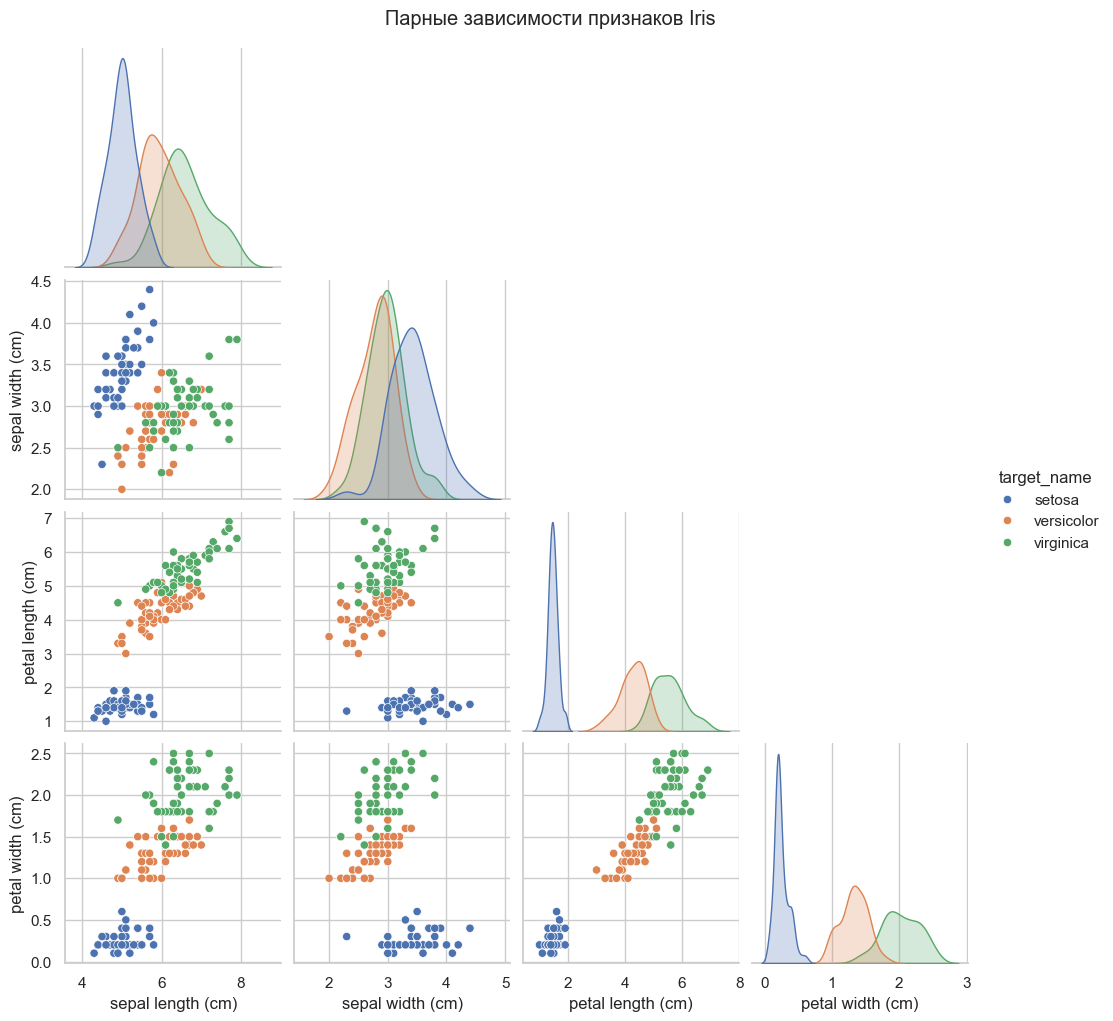

In [8]:
# Парные диаграммы признаков
sns.pairplot(
    df,
    vars=iris_bunch.feature_names,
    hue="target_name",
    corner=True
)
plt.suptitle("Парные зависимости признаков Iris", y=1.02)
plt.show()

In [10]:
# можно закомментировать при отсутствии пакета

try:
    import umap  # pip install umap-learn  
    HAS_UMAP = True
except ImportError:
    HAS_UMAP = False

e:\fmi-ml-courses\clusters\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\marin\AppData\Local\Temp\ipykernel_38648\3104158781.py:23: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
e:\fmi-ml-courses\clusters\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


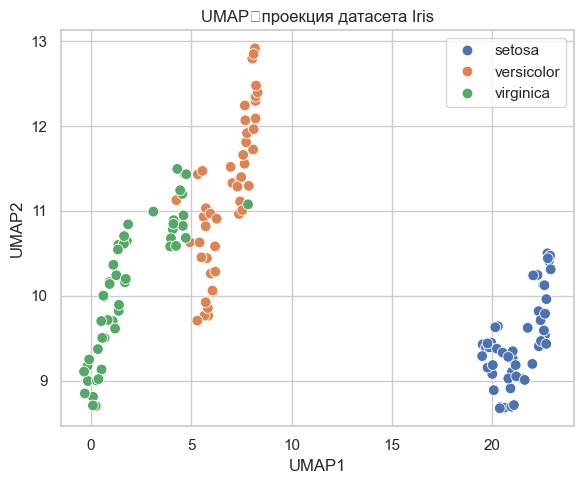

In [ ]:
# ===== Пример применения UMAP (опционально) =====

if HAS_UMAP:
    reducer = umap.UMAP(random_state=42)  # UMAP как общий алгоритм понижения размерности.
    embedding = reducer.fit_transform(iris_bunch.data)  # проекция в 2D‑пространство. 

    umap_df = pd.DataFrame(
        embedding,
        columns=["UMAP1", "UMAP2"]
    )
    umap_df["target_name"] = df["target_name"].values

    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=umap_df,
        x="UMAP1",
        y="UMAP2",
        hue="target_name",
        s=60
    )
    plt.title("UMAP‑проекция датасета Iris")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print(
        "\nUMAP не установлен. "
        "Чтобы использовать понижение размерности UMAP, установите пакет: pip install umap-learn"
    )  # UMAP распространяется как пакет umap-learn.  


Для UMAP обычно сначала масштабируют признаки, например с помощью StandardScaler из scikit‑learn, а затем уже подают их в UMAP.​

Простой пример со StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler 

X = iris_bunch.data       # признаки (4 числовых признака).  
y = iris_bunch.target     # классы (0, 1, 2). 

# 2. Стандартизация признаков: (x - mean) / std.  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # возвращает numpy-массив того же размера.  

In [15]:
# 3. UMAP на стандартизованных данных
umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    # random_state=42,
    n_jobs= -1
)  # базовые параметры UMAP.  

X_umap = umap_model.fit_transform(X_scaled)  # понижение размерности до 2D. 

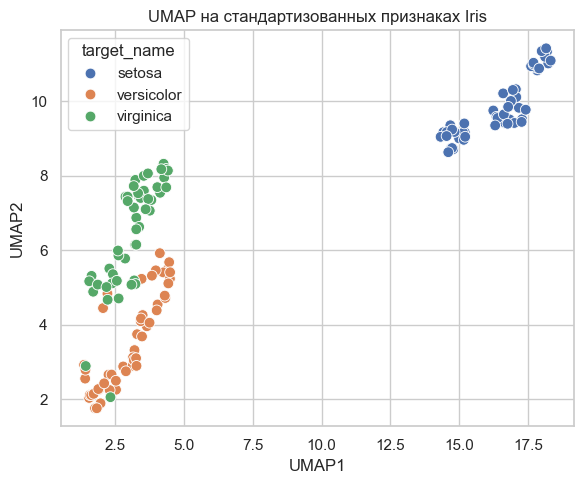

In [16]:
# 4. Визуализация результата
umap_df = pd.DataFrame(
    X_umap,
    columns=["UMAP1", "UMAP2"]
)
umap_df["target"] = y
umap_df["target_name"] = umap_df["target"].apply(lambda i: iris_bunch.target_names[i])

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=umap_df,
    x="UMAP1",
    y="UMAP2",
    hue="target_name",
    s=60
)
plt.title("UMAP на стандартизованных признаках Iris")
plt.tight_layout()
plt.show()

* Стандартизатор обучается только на матрице признаков X и сохраняет среднее и стандартное отклонение для каждого признака.
​

* В UMAP подаётся уже X_scaled, а не исходные значения, что делает метрику расстояния более корректной, когда признаки в разных шкалах.


UMAP умеет работать напрямую с разрежёнными матрицами, а стандартизировать их нужно аккуратно, чтобы не разрушить разрежённость.

 
UMAP принимает sparse‑матрицы (CSR/CSC) и не требует предварительного перевода их в неразреженные матрицы.
​

При стандартизации разреженных данных нельзя вычитать среднее, иначе нули превращаются в ненули и матрица перестаёт быть разрежённой.
​

Для таких случаев в StandardScaler устанавливают with_mean=False, чтобы делить только на стандартное отклонение.


In [30]:
from scipy.sparse import csr_matrix, random

# Создание разреженной матрицы с заданным размером и заполнением
n_rows = 1000  # количество строк (образцов)
n_cols = 5000  # количество столбцов (признаков)
density = 0.01  # плотность (процент ненулевых элементов)

# Способ 1: Создание случайной разреженной матрицы
X_sparse = random(n_rows, n_cols, density=density, format='csr')

print(f"Разреженная матрица {n_rows}x{n_cols}")
print(f"Плотность: {density*100:.1f}%")
print(f"Количество ненулевых элементов: {X_sparse.nnz}")
print(f"Тип матрицы: {type(X_sparse)}")

Разреженная матрица 1000x5000
Плотность: 1.0%
Количество ненулевых элементов: 50000
Тип матрицы: <class 'scipy.sparse._csr.csr_matrix'>


In [28]:
 # 1. Стандартизация разрежённых данных
scaler = StandardScaler(
    with_mean=False,   # важно: не вычитать среднее для sparse.  
    with_std=True
)
X_scaled = scaler.fit_transform(X_sparse)  # остаётся sparse‑матрицей.  

# 2. UMAP на стандартизованных sparse‑данных
umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric="cosine",   # популярная метрика для текстовых/разрежённых данных.  
    #random_state=42
    n_jobs=-1
)
X_embedded = umap_model.fit_transform(X_scaled)  # получается плотный массив (n_samples, 2).  


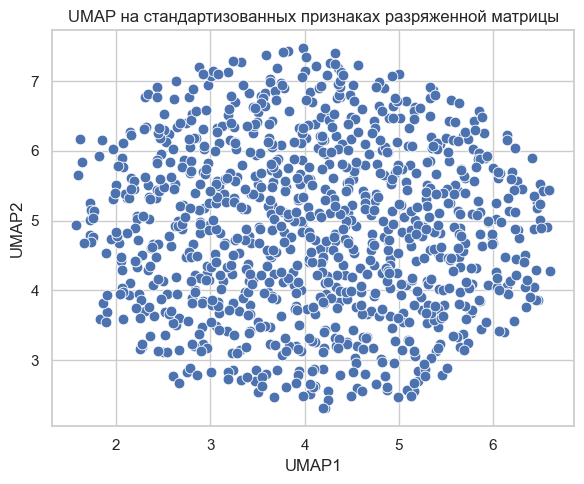

In [31]:
# 4. Визуализация результата
umap_df = pd.DataFrame(
    X_embedded,
    columns=["UMAP1", "UMAP2"]
)

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=umap_df,
    x="UMAP1",
    y="UMAP2",
    #hue="target_name",
    s=60
)
plt.title("UMAP на стандартизованных признаках разряженной матрицы")
plt.tight_layout()
plt.show()